<a href="https://colab.research.google.com/github/joeyee614/tradingstrategies/blob/main/Trading_Strategies_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
from pylab import mpl, plt

In [ ]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%config InlineBackend.figure_format = 'svg'

<ipython-input-20-6de634db2a83>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
from google.colab  import files
uploaded = files.upload()

Saving tr_eikon_eod_data (1).csv to tr_eikon_eod_data (1).csv


In [ ]:
raw = pd.read_csv('tr_eikon_eod_data (1).csv')

In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2216 non-null   object 
 1   AAPL.O  2138 non-null   float64
 2   MSFT.O  2138 non-null   float64
 3   INTC.O  2138 non-null   float64
 4   AMZN.O  2138 non-null   float64
 5   GS.N    2138 non-null   float64
 6   SPY     2138 non-null   float64
 7   .SPX    2138 non-null   float64
 8   .VIX    2138 non-null   float64
 9   EUR=    2216 non-null   float64
 10  XAU=    2211 non-null   float64
 11  GDX     2138 non-null   float64
 12  GLD     2138 non-null   float64
dtypes: float64(12), object(1)
memory usage: 225.2+ KB


In [ ]:
symbol = 'AAPL.O'

In [ ]:
data = (
    pd.DataFrame(raw[symbol])
    .dropna()
  )

Trading Strategy

In [ ]:
SMA1 = 42
SMA2 = 252

In [ ]:
data['SMA1'] = data[symbol].rolling(SMA1).mean()
data['SMA2'] = data[symbol].rolling(SMA2).mean()

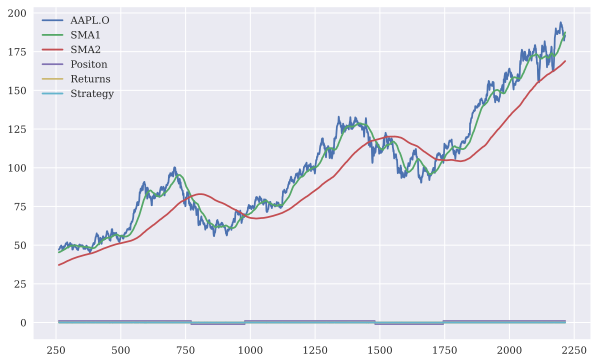

In [ ]:
data.plot(figsize=(10, 6));

In [ ]:
data.dropna(inplace=True)

In [ ]:
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

In [ ]:
data.tail()

,AAPL.O,Returns,SMA1,SMA2,Position,Strategy
2211,182.17,-0.014983,185.606190,168.265556,1,-0.014983
2212,184.43,0.012330,186.087381,168.418770,1,0.012330
2213,184.16,-0.001465,186.607381,168.579206,1,-0.001465
2214,185.50,0.007250,187.089286,168.736627,1,0.007250
2215,185.11,-0.002105,187.470476,168.901032,1,-0.002105


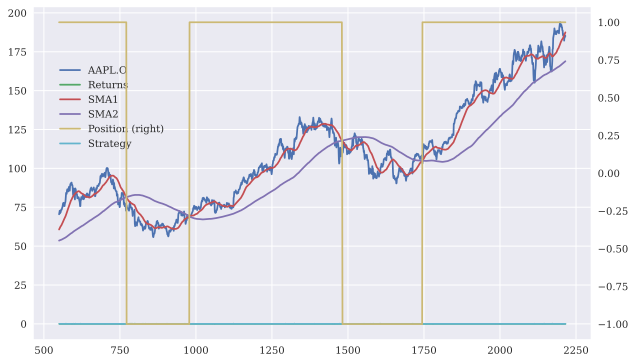

In [ ]:
ax = data.plot(secondary_y = 'Position', figsize=(10, 6))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

Vectorized Backtesting

In [ ]:
data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))

In [ ]:
data['Strategy'] = data['Position'].shift(1) * data['Returns']

In [ ]:
data.round(4).head()

,AAPL.O,SMA1,SMA2,Positon,Returns
260,46.0800,45.2810,37.1207,1,NaN
261,47.0814,45.3497,37.1862,1,0.0215
262,47.3271,45.4126,37.2525,1,0.0052
263,47.7142,45.4661,37.3223,1,0.0081
264,47.6757,45.5226,37.3921,1,-0.0008


In [ ]:
data.dropna(inplace=True)

In [ ]:
np.exp(data[['Returns', 'Strategy']].sum())

Returns     4.017148
Strategy    5.687692
dtype: float64

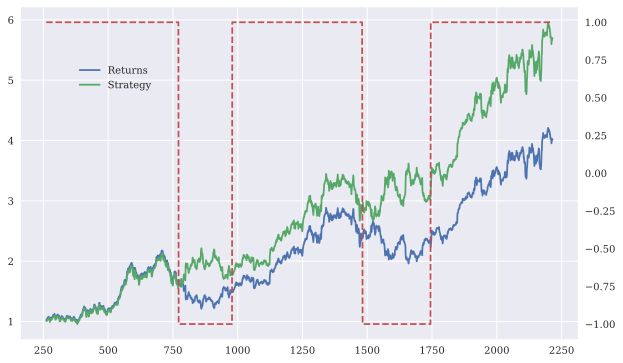

In [ ]:
ax = data[['Returns', 'Strategy']].cumsum(
    ).apply(np.exp).plot(figsize = (10, 6))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

Optimization

In [ ]:
from itertools import product

In [ ]:
sma1 = range(20, 61, 4)
sma2 = range(180, 281, 10)

In [ ]:
results = pd.DataFrame()
for SMA1, SMA2 in product(sma1, sma2):
    data = pd.DataFrame(raw[symbol])
    data.dropna(inplace=True)
    data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
    data['SMA1'] = data[symbol].rolling(SMA1).mean()
    data['SMA2'] = data[symbol].rolling(SMA2).mean()
    data.dropna(inplace=True)
    data['Position']= np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.dropna(inplace= True)
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    results = results.append(pd.DataFrame(
               {'SMA1':SMA1, 'SMA2':SMA2,
                'MARKET':perf['Returns'],
                'STRATEGY': perf['Strategy'],
                'OUT': perf['Strategy'] - perf['Returns']},
                index=[0]), ignore_index=True)

<ipython-input-48-4e3bcdba7640>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
<ipython-input-48-4e3bcdba7640>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
<ipython-input-48-4e3bcdba7640>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
<ipython-input-48-4e3bcdba7640>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
<ipython-input-48-4e3bcdba7640>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMA1      121 non-null    int64  
 1   SMA2      121 non-null    int64  
 2   MARKET    121 non-null    float64
 3   STRATEGY  121 non-null    float64
 4   OUT       121 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 4.9 KB


In [ ]:
results.sort_values('OUT', ascending=False).head(7)

,SMA1,SMA2,MARKET,STRATEGY,OUT
56,40,190,4.650342,7.175173,2.524831
39,32,240,4.045619,6.558690,2.513071
59,40,220,4.220272,6.544266,2.323994
46,36,200,4.074753,6.389627,2.314874
55,40,180,4.574979,6.857989,2.283010
70,44,220,4.220272,6.469843,2.249571
101,56,200,4.074753,6.319524,2.244772


Random Walk Hypothesis

In [ ]:
symbol = '.SPX'

In [ ]:
data = pd.DataFrame(raw[symbol])

In [ ]:
lags = 5
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = data[symbol].shift(lag)
    cols.append(col)

In [ ]:
data.head(7)

,.SPX,lag_1,lag_2,lag_3,lag_4,lag_5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,1132.99,NaN,NaN,NaN,NaN,NaN
2,1136.52,1132.99,NaN,NaN,NaN,NaN
3,1137.14,1136.52,1132.99,NaN,NaN,NaN
4,1141.69,1137.14,1136.52,1132.99,NaN,NaN
5,1144.98,1141.69,1137.14,1136.52,1132.99,NaN
6,1146.98,1144.98,1141.69,1137.14,1136.52,1132.99


In [ ]:
data.dropna(inplace=True)

In [ ]:
reg = np.linalg.lstsq(data[cols], data[symbol], rcond=-1)[0]

In [ ]:
reg.round(3)

array([0.966, 0.005, 0.025, 0.   , 0.003])

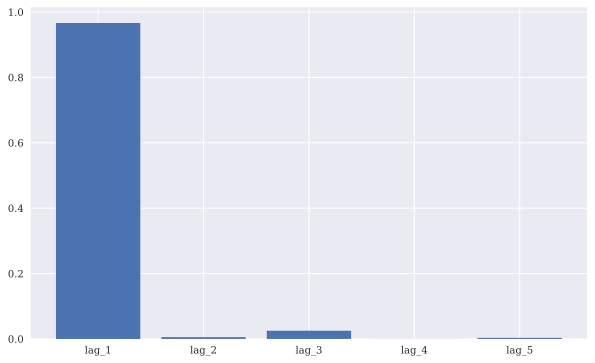

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(cols, reg);

In [ ]:
data['Prediction'] = np.dot(data[cols], reg)

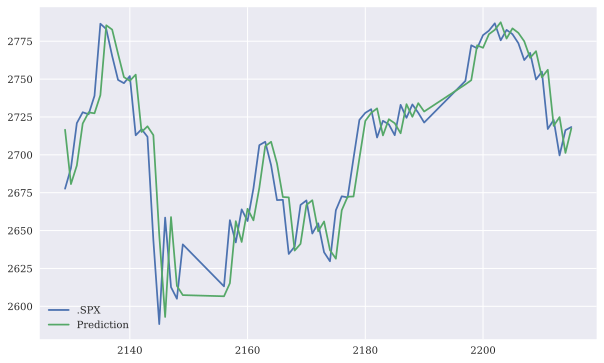

In [ ]:
data[[symbol, 'Prediction']].iloc[-75:].plot(figsize=(10, 6));